### __Author__ : Diba Elahi
### __Course__ : Machine Learning
### __Assignment No. 3__  

**I ulpoad a separate document as the report of this implemenattion**

Importing necessary modules

In [ ]:
pip install hazm

In [ ]:
import scipy.linalg
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
import pandas as pd
import re
from hazm import Normalizer, word_tokenize, Stemmer, Lemmatizer, WordTokenizer
from wordcloud import STOPWORDS
import string
import html
import hazm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import joblib
from gensim.models import Word2Vec
from scipy.sparse import hstack

In [ ]:
np.random.seed(42)

## 1. Preprocessing (Data Cleaning and Feature Engineering)

In [ ]:
column_names = ['sentence', 'emotion']

In [ ]:
xlsx_file_path = '/train_data.xlsx'
df = pd.read_excel(xlsx_file_path)
df.columns = column_names
csv_file_path = '/data.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
test_df = pd.read_csv('/3rdHW_test.csv')

In [ ]:
column_name = ['X']

In [ ]:
test_df.columns = column_name

In [ ]:
test_csv_file_path = '/test_data.csv'

In [ ]:
test_df.to_csv(test_csv_file_path, index=False)

In [ ]:
test_df.head(10)

,X
0,بسیار نرم و لطیف بوده و کیفیت بالایی داره.
1,اصلا رنگش با چیزی که تو عکس بود خیلی فرق داشت
2,خیلی زیبا و ب اندازه و با دقت طراحی شده
3,سبزی پلو با ماهی مال عید نوروزه، امشب سوشی میخ...
4,لج بازیو بذار کنار یه فرصت دیگه بهت میدم
5,بیا چندتا سیل جمعیت نشونت بدم تا دفعه بعدی به...
6,دلم میخواد زیبا باشم و دوست داشته بشم:(
7,عباس علی‌زاده معروف به «بروس‌لی افغانستان» وار...
8,امشب راحت میتوان به این موضوع پی برد مگه نه؟
9,اگر #گاز دارید، خدا را #شُکر کنید و؛ با #صرفه_...


In [ ]:
test_df = pd.read_csv('/test_data.csv')

In [ ]:
df = pd.read_csv('/data.csv')

In [ ]:
df.shape

(4923, 2)

In [ ]:
test_df.shape

(547, 1)

In [ ]:
df['emotion'].unique()

array(['OTHER', 'SAD', 'HAPPY', 'ANGRY', 'FEAR'], dtype=object)

In [ ]:
emotion_counts = df['emotion'].value_counts()

<ipython-input-18-812563ce8cef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


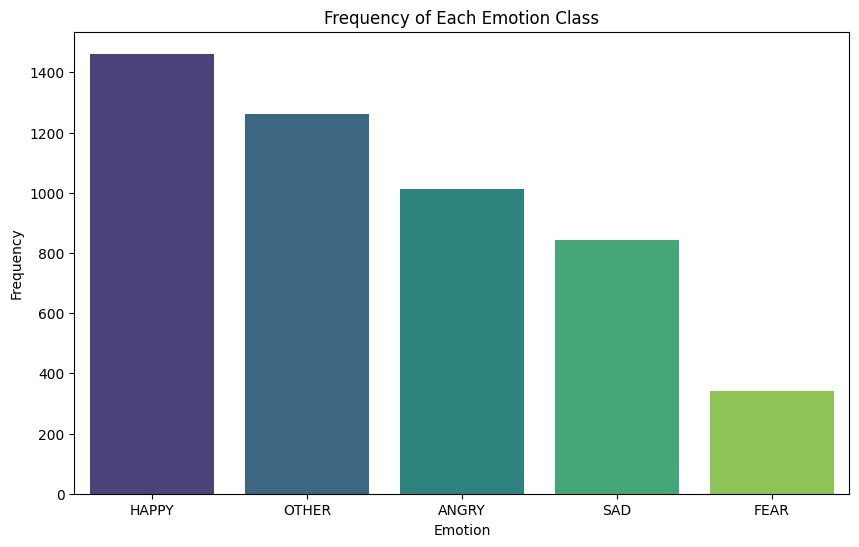

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title('Frequency of Each Emotion Class')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

In [ ]:
normalizer = Normalizer()
tokenizer = WordTokenizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()

In [ ]:
stop_words = [
    'و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك',
    'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز',
    'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر',
    'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس',
    'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده',
    'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند',
    'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند',
    'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي',
    'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف',
    'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي',
    'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر', 'براساس', 'شدند', 'ترين', 'امروز',
    'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده',
    'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم',
    'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش',
    'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر',
    'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك',
    'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست',
    'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا',
    'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد',
    'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي',
    'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا',
    'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند',
    'زياد', 'خويش', 'همواره', 'گذاشته', 'شش', 'نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن',
    'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز',
    'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ',
    'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ',
    'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ',
    'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست',
    'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری',
    'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'بله', 'بلی', 'آره',
    'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش',
    'هنگامی', 'مان', 'تان'
]

In [ ]:
def normalization(text):
  text = normalizer.normalize(text)
  return text

In [ ]:
def remove_url_and_html(text):
  text = re.sub(r'http\S+|www.\S+', '', text)
  text = re.sub(r'<.*?>', '', text)
  return text

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

In [ ]:
def tokenization(text):
  tokens = tokenizer.tokenize(text)
  return tokens

In [ ]:
def remove_stop_words(tokens):
  tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
  return tokens

In [ ]:
def join(tokens):
  return ' '.join(tokens)

In [ ]:
test_df['sentence'] = test_df['X']

In [ ]:
train = pd.DataFrame(df['sentence'])

In [ ]:
test = pd.DataFrame(test_df['sentence'])

In [ ]:
combined_data = pd.concat([train, test], axis=0)

In [ ]:
combined_data.head()

,sentence
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...
4,اگه تو بغلت بودم حالم خیلی بهتر میشد


In [ ]:
combined_data['cleaned_sentence'] = combined_data['sentence'].apply(normalization)

In [ ]:
combined_data['cleaned_sentence'] = combined_data['cleaned_sentence'].apply(remove_url_and_html)

In [ ]:
combined_data['cleaned_sentence'] = combined_data['cleaned_sentence'].apply(clean_text)

In [ ]:
combined_data['cleaned_sentence'] = combined_data['cleaned_sentence'].apply(tokenization)

In [ ]:
combined_data['cleaned_sentence'] = combined_data['cleaned_sentence'].apply(remove_stop_words)

In [ ]:
tokens = combined_data['cleaned_sentence']

In [ ]:
combined_data['cleaned_sentence'] = combined_data['cleaned_sentence'].apply(join)

In [ ]:
corpus = combined_data['cleaned_sentence'].tolist()

In [ ]:
tokenized_corpus = [sentence.split() for sentence in corpus]

In [ ]:
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4, seed=42)

In [ ]:
def get_sentence_embedding(sentence):
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

In [ ]:
X_embeddings = np.array([get_sentence_embedding(sentence) for sentence in tokenized_corpus])

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=5, max_features=10000)

In [ ]:
X_tfidf = tfidf.fit_transform(corpus)

In [ ]:
X_combined = hstack([X_tfidf, X_embeddings])

In [ ]:
X_combined = X_combined.tocsr()

In [ ]:
X = X_combined[:len(train)]
X_test = X_combined[len(train):]

In [ ]:
X.shape

(4923, 2003)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['emotion'])

In [ ]:
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Class Mapping:", class_mapping)
print("Transformed Labels:", y)

Class Mapping: {0: 'ANGRY', 1: 'FEAR', 2: 'HAPPY', 3: 'OTHER', 4: 'SAD'}
Transformed Labels: [3 4 2 ... 4 3 4]


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Tree-based Classification Algorithm

Evaluation method for each tree-based model.

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}\n")

### 2.1 Decision Tree Classifier

In [ ]:
parameter_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
grid_decision_tree = GridSearchCV(decision_tree , parameter_grid_decision_tree, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_decision_tree.fit(X_train, y_train)
best_decision_tree = grid_decision_tree.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
y_pred_decision_tree = best_decision_tree.predict(X_valid)

In [ ]:
evaluate_model(y_valid, y_pred_decision_tree, 'Decision Tree')

Metrics for Decision Tree:
Accuracy: 0.4091
F1 Score: 0.3813
Recall: 0.4091
Precision: 0.4114
Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.24      0.31      0.27       185
        FEAR       0.33      0.05      0.08        66
       HAPPY       0.62      0.54      0.58       306
       OTHER       0.38      0.62      0.47       267
         SAD       0.29      0.06      0.10       161

    accuracy                           0.41       985
   macro avg       0.37      0.32      0.30       985
weighted avg       0.41      0.41      0.38       985




### 2.2 Random Forest Classifier

In [ ]:
parameter_grid_random_forest = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
grid_random_forest = GridSearchCV(random_forest, parameter_grid_random_forest, cv=3, scoring='accuracy')
grid_random_forest.fit(X_train, y_train)
best_random_forest = grid_random_forest.best_estimator_

In [ ]:
y_pred_random_forest = best_random_forest.predict(X_valid)

In [ ]:
evaluate_model(y_valid, y_pred_random_forest, 'Random Forest')

Metrics for Random Forest:
Accuracy: 0.4914
F1 Score: 0.4540
Recall: 0.4914
Precision: 0.5076
Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.32      0.19      0.24       185
        FEAR       0.73      0.12      0.21        66
       HAPPY       0.72      0.69      0.71       306
       OTHER       0.40      0.78      0.53       267
         SAD       0.40      0.13      0.20       161

    accuracy                           0.49       985
   macro avg       0.51      0.38      0.38       985
weighted avg       0.51      0.49      0.45       985




### 2.3 Gradient Boosting Classifier

In [ ]:
parameter_grid_gradient_boosting = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [5],
    'subsample': [0.8],
    'min_samples_split': [5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [ ]:
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
grid_gradient_boosting = GridSearchCV(gradient_boosting, parameter_grid_gradient_boosting, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_gradient_boosting.fit(X_train, y_train)
best_gradient_boosting = grid_gradient_boosting.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
y_pred_gradient_boosting = best_gradient_boosting.predict(X_valid)

In [ ]:
evaluate_model(y_valid, y_pred_gradient_boosting, 'Gradient Boosting')

Metrics for Gradient Boosting:
Accuracy: 0.5797
F1 Score: 0.5804
Recall: 0.5797
Precision: 0.5898
Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.47      0.41      0.44       185
        FEAR       0.52      0.53      0.53        66
       HAPPY       0.80      0.75      0.78       306
       OTHER       0.46      0.60      0.52       267
         SAD       0.55      0.43      0.48       161

    accuracy                           0.58       985
   macro avg       0.56      0.54      0.55       985
weighted avg       0.59      0.58      0.58       985




### 2.4  XGBoost Classifier

In [ ]:
parameter_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
random_search = GridSearchCV(xgboost, parameter_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
y_pred_xgb = best_xgb.predict(X_valid)

In [ ]:
evaluate_model(y_valid, y_pred_xgb, 'XGBoost')

Metrics for XGBoost:
Accuracy: 0.5645
F1 Score: 0.5626
Recall: 0.5645
Precision: 0.5833
Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.52      0.39      0.45       185
        FEAR       0.57      0.45      0.50        66
       HAPPY       0.81      0.72      0.76       306
       OTHER       0.44      0.67      0.53       267
         SAD       0.47      0.33      0.39       161

    accuracy                           0.56       985
   macro avg       0.56      0.51      0.53       985
weighted avg       0.58      0.56      0.56       985




### 3 Final Model Evaluation on Test Data

### 3.1 Logistic Regression

In [ ]:
pipeline = Pipeline([
    ('clf', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f'Accuracy: {cv_scores.max() * 100:.2f}%')
print(f'Standard deviation: {cv_scores.std() * 100:.2f}%')

Accuracy: 62.34%
Standard deviation: 1.99%


### 3.2 Support Vector Classifier

In [ ]:
pipeline = Pipeline([
    ('clf', SVC(probability=True, random_state=42))  # Support Vector model
])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f'Accuracy: {cv_scores.max() * 100:.2f}%')
print(f'Standard deviation: {cv_scores.std() * 100:.2f}%')

Accuracy: 61.52%
Standard deviation: 1.04%


### 3.3 Ensemble Model

In [ ]:
model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = SVC(probability=True, random_state=42)

In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('svc', model2)
    ],
    voting='soft'
)

In [ ]:
pipeline = Pipeline([
    ('clf', ensemble)  # Ensemble model
])

In [ ]:
param_grid = {
    'clf__lr__C': [0.1, 1],  # Logistic Regression regularization parameter
    'clf__lr__solver': ['lbfgs'],  # Use only 'lbfgs' solver for Logistic Regression
    'clf__svc__C': [1, 10],  # SVM regularization parameter
    'clf__svc__kernel': ['linear', 'rbf'],  # Use  'linear' and 'rbf' kernels for SVM
    'clf__svc__gamma': ['scale']  # Use only 'scale' for gamma
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X, y)
best_ensemble = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
cv_scores = cross_val_score(best_ensemble, X, y, cv=5, scoring='accuracy')
print(f'Accuracy: {cv_scores.max() * 100:.2f}%')
print(f'Standard deviation: {cv_scores.std() * 100:.2f}%')

Accuracy: 63.86%
Standard deviation: 1.94%


### 4 Test Set

In [ ]:
X_test.shape

(547, 2003)

In [ ]:
y_pred_test = best_ensemble.predict(X_test)

In [ ]:
label_to_emotion = {0: 'ANGRY', 1: 'FEAR', 2: 'HAPPY', 3: 'OTHER', 4: 'SAD'}

In [ ]:
y_df = pd.DataFrame({'predicted_label': y_pred_test})

In [ ]:
test_df['Y'] = y_df['predicted_label'].map(label_to_emotion)

In [ ]:
columns_to_remove = ['sentence']

In [ ]:
test_df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
test_df.to_csv('/result.csv', index=False)